In [17]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import graphviz

from sklearn import metrics
data = pd.read_csv("adultdata.csv",sep=',',header=0)


# graphviz
#1 . Download and install graphviz-2.38.msi from https://graphviz.gitlab.io/_pages/Download/Download_windows.html

#2 . Set the path variable

#(a) Control Panel > System and Security > System > Advanced System Settings >  Environment Variables > Path > Edit

#(b) add 'C:\Program Files (x86)\Graphviz2.38\bin'

In [2]:
data.head()

,Age,Workclass,EducationNum,MaritalStatus,Occupation,Race,Sex,HoursPerWeek,NativeArea,Income
0,1,1,13,2,2,0,0,1,0,0
1,2,2,13,1,3,0,0,0,0,0
2,1,0,9,0,5,0,0,1,0,0
3,2,0,7,1,5,3,0,1,0,0
4,0,0,13,1,9,3,1,1,1,0


In [3]:
# find # of points
print("dataset length:"),len(data)

dataset length:


(None, 32561)

In [4]:
# convert data to numeric data for classification (will not process strings)
# alternative is OneHotEncoder

#Preprocessed now

#for column in data.columns:
#    if data[column].dtype == type(object):
#        le = LabelEncoder()
#        data[column] = le.fit_transform(data[column])
# trying to get data transformations listed, not working        
#for i in range(0,data.shape[1]):
#    if data.dtypes[i]=='object':
#        data[data.columns[i]]=le.fit_transform(data[data.columns[i]])
#le_name_mapping=dict(zip(le.classes_, le.transform(le.classes_)))
#print(le_name_mapping)

In [5]:
#data.head()


In [6]:
# need to get these in our decision tree for readability
names=list(data)
names

['Age',
 'Workclass',
 'EducationNum',
 'MaritalStatus',
 'Occupation',
 'Race',
 'Sex',
 'HoursPerWeek',
 'NativeArea',
 'Income']

In [7]:
# make sure dependent variable is correct column
#list(le.classes_)

In [8]:
# Divide columns for dependent and dependent variables
X= data.values[:,0:8]
Y= data.values[:,9] # dependent variable (income)

# separate into training and test data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.3,random_state=100)

In [9]:
# Decision Tree Classifier with Entropy
tree1 = DecisionTreeClassifier(criterion="entropy",splitter="best",random_state=100,max_depth=6,min_samples_leaf=10)
tree1.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [25]:
prediction=tree1.predict(Xtest)
prediction
print("Accuracy is ",accuracy_score(Ytest,prediction)*100)

Accuracy is  82.01453577643566


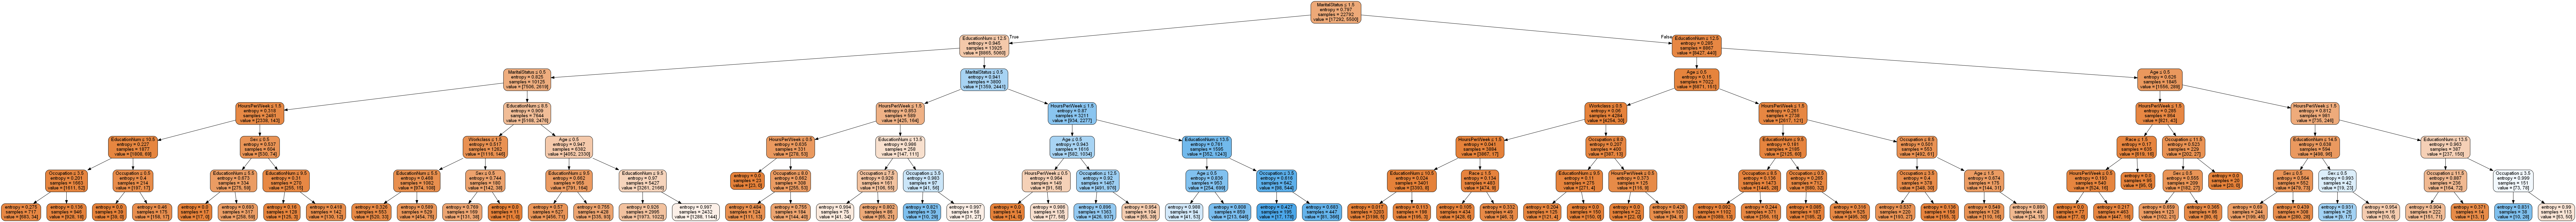

In [10]:
# create visualization
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
#export_graphviz(gini,out_file=dot_data,filled=True,rounded=True,special_characters=True)

export_graphviz(tree1,out_file=dot_data,feature_names=names[0:8],filled=True,rounded=True,special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [11]:
# Decision Tree classifier with criterion information gain
tree4 = DecisionTreeClassifier(criterion = "entropy", random_state=100,max_depth=4,min_samples_leaf=10)
tree4.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [15]:
prediction=tree4.predict(Xtest)
prediction
print("Accuracy is ",accuracy_score(Ytest,prediction)*100)

Accuracy is  81.86098884225612


In [23]:
# confusion matrix
confusion=(metrics.confusion_matrix(Ytest,prediction))
print(confusion)
TP=confusion[1,0]
TP=confusion[0,0]
TP=confusion[0,1]
TP=confusion[1,1]


[[7034  394]
 [1378  963]]


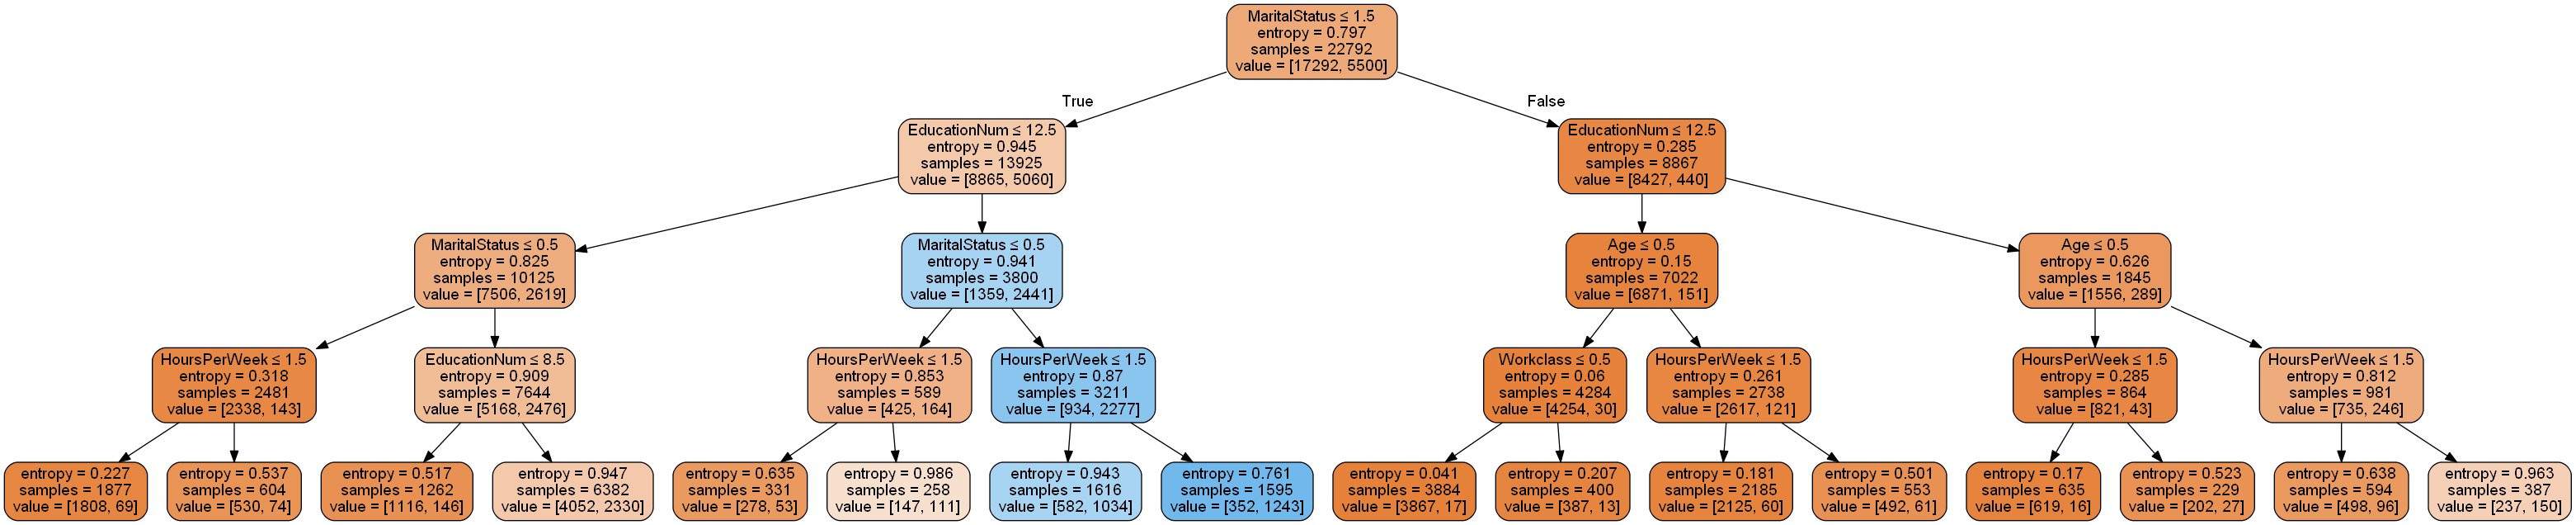

In [24]:
# create visualization
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree4,out_file=dot_data,feature_names=names[0:8],filled=True,rounded=True,special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [28]:
# Decision Tree classifier with criterion information gain
tree3 = DecisionTreeClassifier(criterion = "entropy", random_state=100,max_depth=4,min_samples_split=100,max_features=3,min_samples_leaf=30)
tree3.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=30,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [29]:
prediction=tree3.predict(Xtest)
prediction
print("Accuracy is ",accuracy_score(Ytest,prediction)*100)

Accuracy is  80.56095813286927


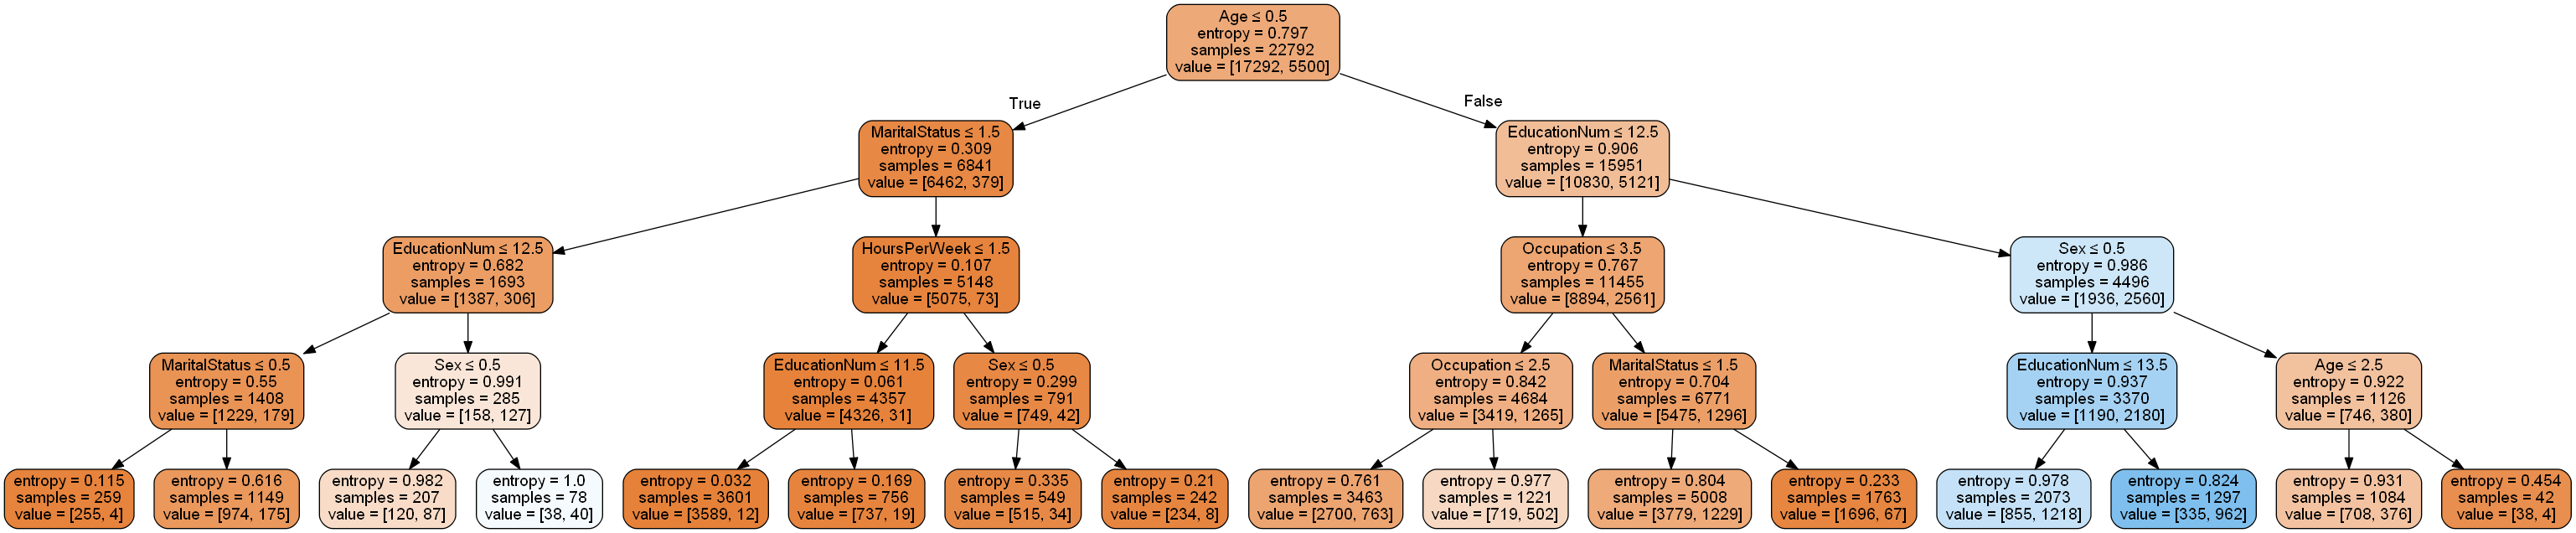

In [91]:
# create visualization
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree3,out_file=dot_data,feature_names=names[0:8],filled=True,rounded=True,special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [30]:
# Decision Tree classifier with criterion information gain
tree3a = DecisionTreeClassifier(criterion = "entropy", random_state=100,max_depth=3,min_samples_leaf=10)
tree3a.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [31]:
prediction=tree3a.predict(Xtest)
prediction
print("Accuracy is ",accuracy_score(Ytest,prediction)*100)

Accuracy is  81.86098884225612


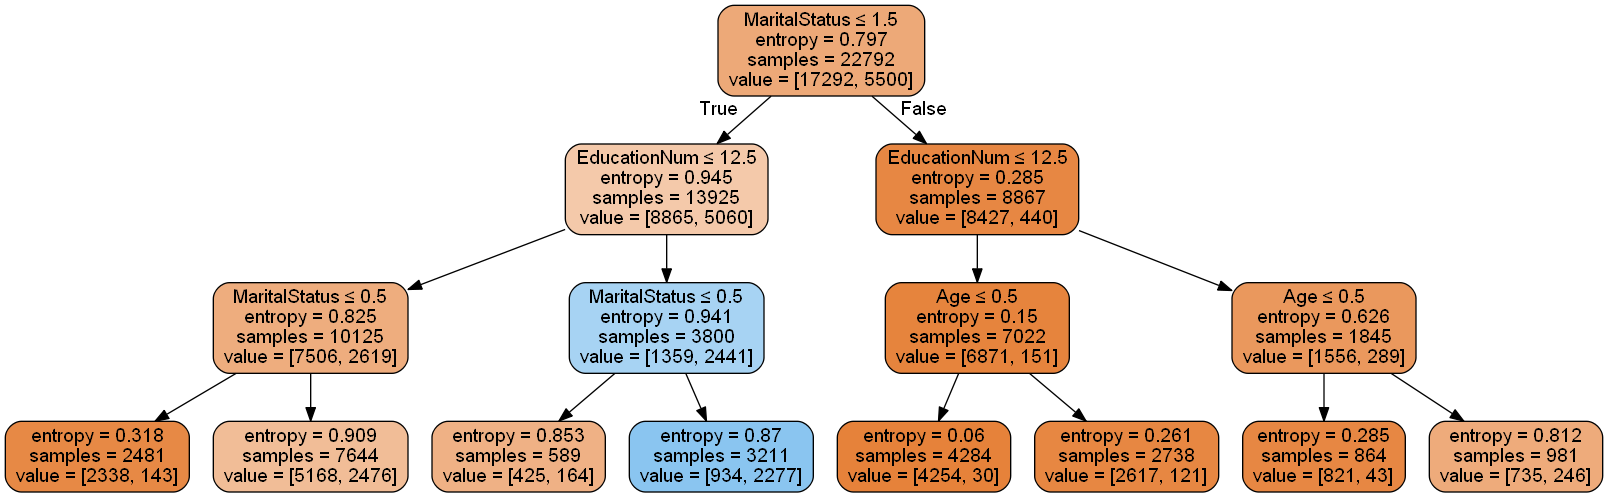

In [32]:
# create visualization
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree3a,out_file=dot_data,feature_names=names[0:8],filled=True,rounded=True,special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())